In [1]:
# Created by Nicolas on 07/05/2021.
# Not Investment Advice and for demonstration purposes only!
# Let's analyse the performance of four cryptocurrencies:
# -Cardano (ADA)
# -Ethereum (ETH)
# -Ripple (XRP)
# -Binance Coin (BNB)
# We will calculate return, risk and correlations

In [2]:
# importing libraries
import numpy as np
import pandas as pd
import pandas_datareader as web
from matplotlib import pyplot as plt

In [3]:
# importing the data
symbols = ['ADA-USD', 'ETH-USD','XRP-USD', 'BNB-USD']
start_date = '2020-05-01'
end_date = '2021-05-01'
crypto_data = web.get_data_yahoo(symbols, start_date, end_date)

In [4]:
crypto_data.head()

Attributes Adj Close                                      Close              \
Symbols      ADA-USD     ETH-USD   XRP-USD    BNB-USD   ADA-USD     ETH-USD   
Date                                                                          
2020-04-30  0.051260  214.219101  0.219248  17.564993  0.051260  214.219101   
2020-05-01  0.051014  215.325378  0.223914  17.584904  0.051014  215.325378   
2020-05-02  0.048929  210.933151  0.219414  17.126299  0.048929  210.933151   
2020-05-03  0.049664  208.174011  0.218963  17.100756  0.049664  208.174011   
2020-05-04  0.049358  206.774399  0.216463  16.919775  0.049358  206.774399   

Attributes                           High              ...       Low  \
Symbols      XRP-USD    BNB-USD   ADA-USD     ETH-USD  ...   XRP-USD   
Date                                                   ...             
2020-04-30  0.219248  17.564993  0.051955  217.628021  ...  0.212795   
2020-05-01  0.223914  17.584904  0.051510  215.847534  ...  0.217248   
2020-05-02  0.219414  17.126299  0.051691  219.270874  ...  0.217737   
2020-05-03  0.218963  17.100756  0.050228  211.828384  ...  0.210598   
2020-05-04  0.216463  16.919775  0.050502  211.778625  ...  0.215441   

Attributes                 Open                                        Volume  \
Symbols       BNB-USD   ADA-USD     ETH-USD   XRP-USD    BNB-USD      ADA-USD   
Date                                                                            
2020-04-30  17.026531  0.047826  207.901733  0.212858  17.046522  169546437.0   
2020-05-01  17.406445  0.051196  214.230087  0.219275  17.551817  128138136.0   
2020-05-02  17.027967  0.051032  215.352066  0.224064  17.581791  139890791.0   
2020-05-03  16.462002  0.048964  210.890854  0.219451  17.135752  172243659.0   
2020-05-04  16.727106  0.049668  208.013000  0.218910  17.088411  128066778.0   

Attributes                                           
Symbols          ETH-USD       XRP-USD      BNB-USD  
Date                                                 
2020-04-30  2.081632e+10  2.306876e+09  453439052.0  
2020-05-01  1.826088e+10  2.170662e+09  393955300.0  
2020-05-02  2.046903e+10  2.182400e+09  381109061.0  
2020-05-03  2.260245e+10  2.462195e+09  390548947.0  
2020-05-04  1.900469e+10  2.104128e+09  358987881.0  

[5 rows x 24 columns]

In [5]:
crypto_data.tail()

Attributes Adj Close                                        Close  \
Symbols      ADA-USD      ETH-USD   XRP-USD     BNB-USD   ADA-USD   
Date                                                                
2021-04-27  1.335666  2746.380127  1.358601  562.632568  1.335666   
2021-04-28  1.308014  2756.876953  1.399360  599.706543  1.308014   
2021-04-29  1.352449  2773.207031  1.591674  624.080566  1.352449   
2021-04-30  1.353071  2945.892822  1.651025  619.347229  1.353071   
2021-05-01  1.326812  2952.056152  1.562641  622.101013  1.326812   

Attributes                                         High               ...  \
Symbols         ETH-USD   XRP-USD     BNB-USD   ADA-USD      ETH-USD  ...   
Date                                                                  ...   
2021-04-27  2746.380127  1.358601  562.632568  1.348198  2757.477295  ...   
2021-04-28  2756.876953  1.399360  599.706543  1.410331  2797.972412  ...   
2021-04-29  2773.207031  1.591674  624.080566  1.369041  2796.054932  ...   
2021-04-30  2945.892822  1.651025  619.347229  1.367415  2951.440918  ...   
2021-05-01  2952.056152  1.562641  622.101013  1.354889  2984.891846  ...   

Attributes       Low                  Open                                     \
Symbols      XRP-USD     BNB-USD   ADA-USD      ETH-USD   XRP-USD     BNB-USD   
Date                                                                            
2021-04-27  1.288701  539.072510  1.305966  2664.685547  1.401563  568.745667   
2021-04-28  1.330947  554.284668  1.337107  2748.649658  1.357965  562.873596   
2021-04-29  1.376468  586.205811  1.306196  2757.734131  1.398500  599.988464   
2021-04-30  1.529947  611.302002  1.352431  2772.838379  1.598409  622.469299   
2021-05-01  1.533620  595.858765  1.351402  2945.560059  1.651960  619.972107   

Attributes        Volume                                            
Symbols          ADA-USD       ETH-USD       XRP-USD       BNB-USD  
Date                                                                
2021-04-27  2.981477e+09  3.426903e+10  9.272726e+09  3.648785e+09  
2021-04-28  3.997566e+09  3.257813e+10  7.633164e+09  6.585919e+09  
2021-04-29  2.691073e+09  2.977718e+10  1.416085e+10  5.741358e+09  
2021-04-30  2.030816e+09  2.872621e+10  8.206771e+09  4.065705e+09  
2021-05-01  1.994292e+09  2.803201e+10  6.933641e+09  3.765185e+09  

[5 rows x 24 columns]

In [6]:
# Statistics (for adjusted close price)
crypto_data['Adj Close'].describe()


Symbols,ADA-USD,ETH-USD,XRP-USD,BNB-USD
count,364.000000,364.000000,364.000000,364.000000
mean,0.375932,832.463854,0.400406,97.258826
std,0.443943,711.531949,0.313072,147.763204
min,0.047677,185.912842,0.175870,15.097545
25%,0.096220,331.318504,0.223168,20.133345
50%,0.137432,434.433182,0.272422,28.530214
75%,0.385397,1384.794464,0.472542,47.027560
max,1.481588,2952.056152,1.839236,624.080566


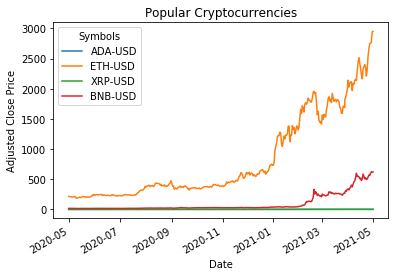

In [7]:
# Ploting the adjusted close price from 30/04/20 to 02/05/21
crypto_data_adj_close_prices = crypto_data['Adj Close']
crypto_data_adj_close_prices.plot()
plt.xlabel('Date')
plt.ylabel('Adjusted Close Price')
plt.title('Popular Cryptocurrencies')
plt.show()

In [8]:
# Just by looking at the graph, it seems that Ethereum is the best performer over the last year
# But the numbers are about to tell a different story...

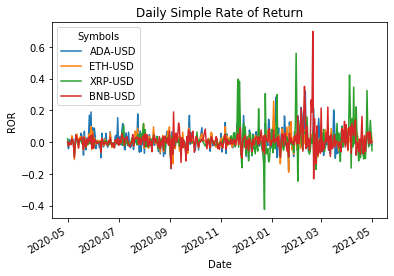

<Figure size 1584x1296 with 0 Axes>

In [9]:
# Let's calculate the simple rate of return
crypto_data_daily_returns = crypto_data['Adj Close'].pct_change()
crypto_data_daily_returns.plot()
plt.xlabel('Date')
plt.ylabel('ROR')
plt.title('Daily Simple Rate of Return')
plt.figure(figsize = (22, 18))
plt.show()

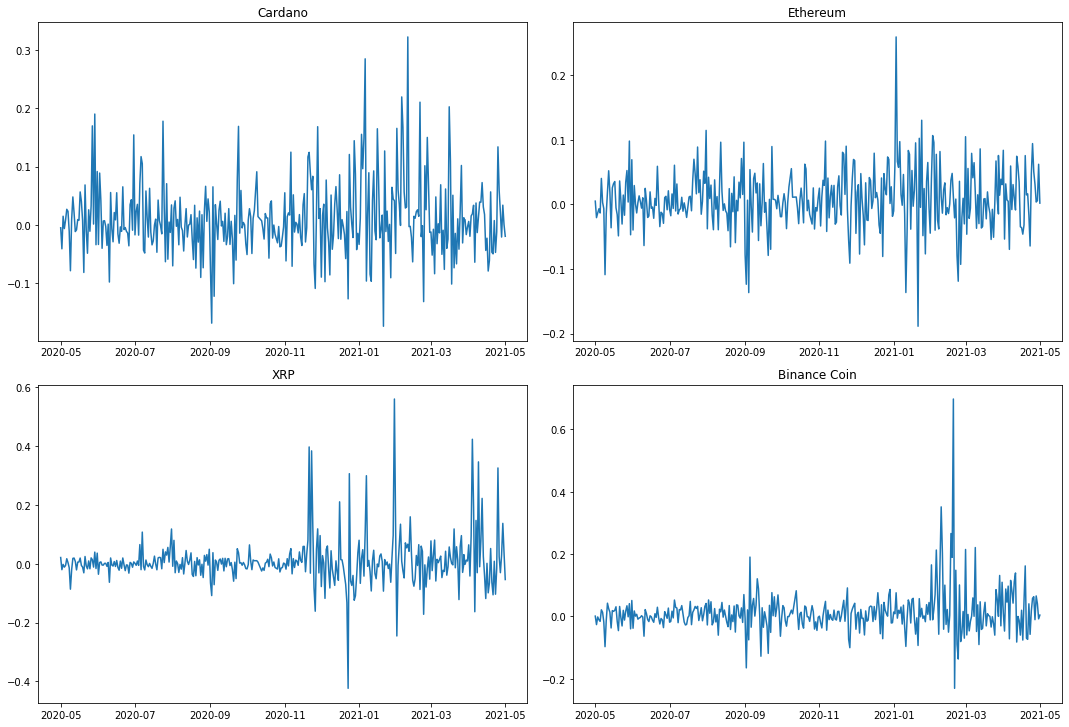

In [10]:
# Creating Subplots
fig = plt.figure(figsize = (15, 15))
ax1 = fig.add_subplot(321)
ax2 = fig.add_subplot(322)
ax3 = fig.add_subplot(323)
ax4 = fig.add_subplot(324)

# adding the data
ax1.plot(crypto_data['Adj Close']['ADA-USD'].pct_change())
ax1.set_title('Cardano')
ax2.plot(crypto_data['Adj Close']['ETH-USD'].pct_change())
ax2.set_title('Ethereum')
ax3.plot(crypto_data['Adj Close']['XRP-USD'].pct_change())
ax3.set_title('XRP')
ax4.plot(crypto_data['Adj Close']['BNB-USD'].pct_change())
ax4.set_title('Binance Coin')
plt.tight_layout()
plt.show()


In [11]:
# Calculating and ploting the mean of each crypto asset daily simple rate of return
daily_mean = crypto_data_daily_returns.mean()
# round to 4 decimals
round(daily_mean, 4)

Symbols
ADA-USD    0.0109
ETH-USD    0.0083
XRP-USD    0.0085
BNB-USD    0.0119
dtype: float64

In [12]:
# daily mean index for the x axis
daily_mean.keys()

Index(['ADA-USD', 'ETH-USD', 'XRP-USD', 'BNB-USD'], dtype='object', name='Symbols')

In [13]:
# grab each daily mean value for the y axis
height = []
for key in daily_mean.keys():
    height.append(daily_mean[key])
height

[0.010936678176231724,
 0.008311611350103389,
 0.008451945934216094,
 0.011945409706099188]

In [14]:
# arrange keys on x axis based on length
x_pos = np.arange(len(daily_mean.keys()))
x_pos

array([0, 1, 2, 3])

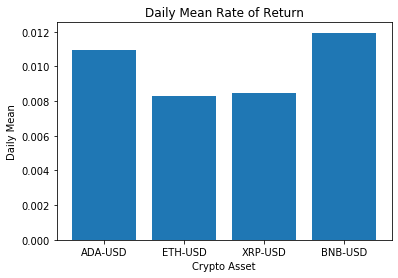

In [15]:
# plot bars
plt.bar(x_pos, height)
 
# create names on the x-axis
plt.xticks(x_pos, daily_mean.keys())

# label chart
plt.xlabel("Crypto Asset")
plt.ylabel("Daily Mean")
plt.title("Daily Mean Rate of Return")

# show graphic
plt.show()

In [16]:
# As observed in the bar graph above the best performer is:
# Binance Coin (BNB) followed by Cardano (ADA)

In [17]:
# Calculating Variance
daily_var = crypto_data_daily_returns.var()
# round to 4 decimals
round(daily_var, 4)

Symbols
ADA-USD    0.0040
ETH-USD    0.0021
XRP-USD    0.0065
BNB-USD    0.0047
dtype: float64

In [18]:
# variance index for the x axis
daily_var.keys()


Index(['ADA-USD', 'ETH-USD', 'XRP-USD', 'BNB-USD'], dtype='object', name='Symbols')

In [19]:
# grab each variance value for the y axis
height = []
for key in daily_var.keys():
    height.append(daily_var[key])
height

[0.004048943760936459,
 0.002137860263986976,
 0.006512902982841683,
 0.004693756031489144]

In [20]:
# arrange keys on x axis based on length
x_pos = np.arange(len(daily_var.keys()))
x_pos

array([0, 1, 2, 3])

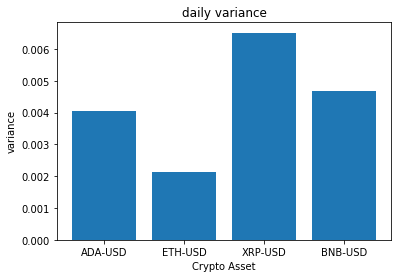

In [21]:
# plot bars
plt.bar(x_pos, height)
 
# create names on the x-axis
plt.xticks(x_pos, daily_var.keys())

# label chart
plt.xlabel("Crypto Asset")
plt.ylabel("variance")
plt.title("daily variance")

# show graphic
plt.show()

In [22]:
# According to the above, XRP seems to be the most volatile crypto asset. 
# Ethereum seems to be the least volatile.

In [24]:
# Calculating Standard Deviation
daily_std = crypto_data_daily_returns.std()
daily_std

Symbols
ADA-USD    0.063631
ETH-USD    0.046237
XRP-USD    0.080703
BNB-USD    0.068511
dtype: float64

In [25]:
daily_var.keys()

Index(['ADA-USD', 'ETH-USD', 'XRP-USD', 'BNB-USD'], dtype='object', name='Symbols')

In [26]:
# grabbing the values for the y axis
height = []
for key in daily_std.keys():
    height.append(daily_std[key])
height

[0.06363131116782413,
 0.046237001027174936,
 0.08070255871310204,
 0.06851099204864242]

In [28]:
# arrange keys for x axis based on length
x_pos = np.arange(len(daily_std.keys()))
x_pos

array([0, 1, 2, 3])

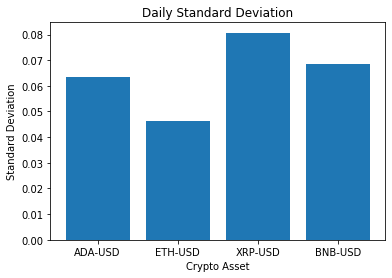

In [31]:
# plot bars
plt.bar(x_pos, height)

# create names on the x-axis
plt.xticks(x_pos, daily_std.keys())

# label chart
plt.xlabel("Crypto Asset")
plt.ylabel("Standard Deviation")
plt.title("Daily Standard Deviation")

# show graphic
plt.show()

In [32]:
# Now time to calculate wether or not 
# there are any correlations between those crypto assets
crypto_data_daily_returns.corr()

Symbols,ADA-USD,ETH-USD,XRP-USD,BNB-USD
Symbols,,,,
ADA-USD,1.000000,0.604231,0.327168,0.378387
ETH-USD,0.604231,1.000000,0.412582,0.435562
XRP-USD,0.327168,0.412582,1.000000,0.294926
BNB-USD,0.378387,0.435562,0.294926,1.000000


In [33]:
# Seems like there is a high positive correlation between Cardano and Ethereum